#DEEP LEARNING PROJECT
#**TITLE : Mental health prediction**


NOTE : To run this entire all the code blocks, just open the notebook in any python environment and run all the code cells, as we have provided pip install for the required libraries and then the subsequent cells will run without any error and we have stored the dataset in our github repository and even in the code we have loaded the dataset using the github repository raw verison of the datasets. so there won't be any issues in running the code cells.

In [83]:
pip install tensorflow numpy pandas scikit-learn


Here we are importing required libraries

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.metrics import AUC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. LOAD THE DATASET
Loading the dataset and preprocessing the data

In [85]:
url_df1 = 'https://raw.githubusercontent.com/BapureddyY/deeplearning/4796bf6574db5e106b8f52f975b6e2cad9445eb8/Student_Mental%20_health.csv'
url_df2 = 'https://raw.githubusercontent.com/BapureddyY/deeplearning/main/students_mental_health_survey.csv'

# Load the data into pandas DataFrames
df1 = pd.read_csv(url_df1)
df2 = pd.read_csv(url_df2)

# Dataset 1
df1 = df1.drop_duplicates().dropna()

# Dataset 2
df2 = df2.drop_duplicates().dropna()

In the below code block, we have preprocessed the data and it starts by selecting relevant features from a DataFrame, encoding categorical variables (such as gender, course of study, and marital status) using a LabelEncoder and then splitting the data into training and testing sets.

In [86]:
#For Dataset 1
pd.options.mode.chained_assignment = None
selected_features_df1 = df1[['Choose your gender', 'Age', 'What is your course?', 'Your current year of Study', 'What is your CGPA?', 'Marital status']]
predictor_column_df1 = df1['Do you have Depression?']
label_encoder = LabelEncoder()
selected_features_df1['Choose your gender'] = label_encoder.fit_transform(selected_features_df1['Choose your gender'])
selected_features_df1['What is your course?'] = label_encoder.fit_transform(selected_features_df1['What is your course?'])
selected_features_df1['Marital status'] = label_encoder.fit_transform(selected_features_df1['Marital status'])
features_observations_matrix_df1 = selected_features_df1.copy()
features_observations_matrix_df1['PredictorColumn'] = predictor_column_df1
X_train, X_test, y_train, y_test = train_test_split(
    selected_features_df1, predictor_column_df1, test_size=0.2, random_state=42
)
print("Features x Observations Matrix with Predictor Column:")
print(features_observations_matrix_df1)
print("\nAdditional Machine Learning Concepts:")
print(f"Number of Samples: {len(df1)}")
print(f"Number of Features: {len(selected_features_df1.columns)}")
print(f"Number of Unique Classes in the Predictor Column: {len(predictor_column_df1.unique())}")
print(f"Training Set Size: {len(X_train)}")
print(f"Testing Set Size: {len(X_test)}")


Features x Observations Matrix with Predictor Column:
     Choose your gender   Age  What is your course?  \
0                     0  18.0                    17   
1                     1  21.0                    25   
2                     1  19.0                     4   
3                     0  22.0                    33   
4                     1  23.0                    37   
..                  ...   ...                   ...   
96                    0  21.0                     2   
97                    1  18.0                    17   
98                    0  19.0                    38   
99                    0  23.0                    39   
100                   1  20.0                     7   

    Your current year of Study What is your CGPA?  Marital status  \
0                       year 1        3.00 - 3.49               0   
1                       year 2        3.00 - 3.49               0   
2                       Year 1        3.00 - 3.49               0   
3        

df2 focuses on attributes such as age, course, gender, CGPA, stress levels, and other psychological and lifestyle factors that influence an individual's depression score. After selecting these features, the code sets up a 'PredictorColumn' within a new DataFrame to store the depression scores,The entire dataset is displayed, which includes all selected features along with the depression scores.

In [87]:
#For Dataset 2
pd.options.mode.chained_assignment = None
selected_features_df2 = df2[['Age', 'Course', 'Gender', 'CGPA', 'Stress_Level', 'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support', 'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use', 'Family_History', 'Chronic_Illness', 'Financial_Stress', 'Extracurricular_Involvement', 'Semester_Credit_Load', 'Residence_Type']]
predictor_column_df2 = df2['Depression_Score']
features_observations_matrix_df2 = selected_features_df2.copy()
features_observations_matrix_df2['PredictorColumn'] = predictor_column_df2
print(features_observations_matrix_df2)

      Age       Course  Gender  CGPA  Stress_Level  Anxiety_Score  \
0      25       Others    Male  3.56             3              2   
1      24  Engineering  Female  2.44             0              0   
2      19     Business  Female  3.74             4              3   
4      18     Business    Male  3.40             3              4   
5      21      Medical  Female  3.35             2              3   
...   ...          ...     ...   ...           ...            ...   
7016   20          Law  Female  3.33             1              1   
7017   20          Law  Female  3.69             3              5   
7018   24      Medical  Female  3.73             3              1   
7019   26       Others    Male  3.65             4              1   
7020   24      Medical    Male  3.65             4              4   

     Sleep_Quality Physical_Activity Diet_Quality Social_Support  \
0             Good          Moderate         Good       Moderate   
1          Average               Lo

The below function is designed to merge the datasets and preprocess it, they gets merged based on the common attribute "AGE", and after that it drops the missing values in the target variable.

In [88]:
pd.options.mode.chained_assignment = None
def preprocess_data(dataset1, dataset2, target_variable):
    merged_dataset = pd.merge(df1, df2, on="Age")
    merged_dataset = merged_dataset.dropna(subset=[target_variable])
    #convert 'What is your CGPA?' to numerical format
    merged_dataset['What is your CGPA?'] = merged_dataset['What is your CGPA?'].apply(
        lambda x: float(x.split(' - ')[0]) + float(x.split(' - ')[1]) / 2 if '-' in x else float(x)
    )

    return merged_dataset

In the below code block, we have encoded categorical variables such as gender, course, and marital status using LabelEncoder and then selects relevant features from both datasets. scales them using StandardScaler, and splits them into training and test sets

In [89]:
# Encoding and selecting features from dataset 1
label_encoder = LabelEncoder()
df1['Choose your gender'] = label_encoder.fit_transform(df1['Choose your gender'])
df1['What is your course?'] = label_encoder.fit_transform(df1['What is your course?'])
df1['Marital status'] = label_encoder.fit_transform(df1['Marital status'])
df1_features = df1[['Choose your gender', 'Age', 'What is your course?', 'Marital status']]
df1_target = label_encoder.fit_transform(df1['Do you have Depression?'])  # Classification target

# Encoding and selecting features from dataset 2
df2['Course'] = label_encoder.fit_transform(df2['Course'])
df2['Gender'] = label_encoder.fit_transform(df2['Gender'])
df2_features = df2[['Age', 'Course', 'Gender', 'CGPA', 'Depression_Score']]  # Including Depression_Score for merging

# Merge datasets on 'Age'
merged_df = pd.merge(df1, df2, on='Age', suffixes=('_df1', '_df2'))
merged_features = merged_df[['Choose your gender', 'Age', 'What is your course?', 'Marital status', 'Course', 'Gender', 'CGPA']]
merged_target_classification = label_encoder.fit_transform(merged_df['Do you have Depression?'])
merged_target_regression = merged_df['Depression_Score'].values


X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(merged_features, merged_target_classification, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(merged_features, merged_target_regression, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)
X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)


**Exploratory Data Analysis**

In the below codeblock we have displayed the summary and statistical overview of two datasets. It sets the Seaborn graphing style to "whitegrid" which enhances the visibility of plotted data points on a white background with grid lines.

In [90]:
sns.set(style="whitegrid")

# Display basic statistics and info about the datasets
print("Dataset 1 Summary:")
print(df1.describe())
print(df1.info())

print("\nDataset 2 Summary:")
print(df2.describe())
print(df2.info())


Dataset 1 Summary:
       Choose your gender        Age  What is your course?  Marital status
count          100.000000  100.00000            100.000000      100.000000
mean             0.250000   20.53000             17.190000        0.160000
std              0.435194    2.49628             14.017086        0.368453
min              0.000000   18.00000              0.000000        0.000000
25%              0.000000   18.00000              4.000000        0.000000
50%              0.000000   19.00000             17.000000        0.000000
75%              0.250000   23.00000             28.000000        0.000000
max              1.000000   24.00000             48.000000        1.000000
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     100 n

This code block generates visualizations for the distributions of specific variables from two different datasets.\
The first part creates a histogram for the 'Age' variable in df1 using Seaborn's histplot function.\
The second part produces a boxplot for the 'CGPA' variable in df2, utilizing Seaborn’s boxplot function.

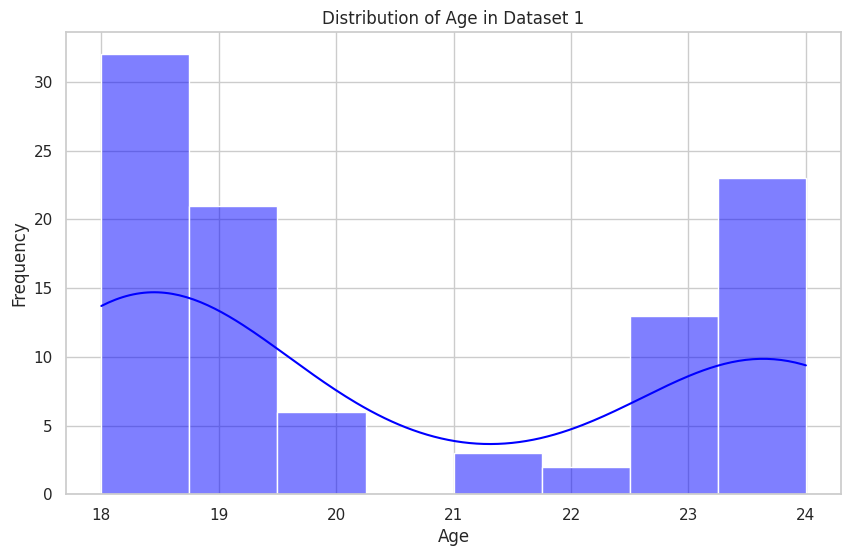

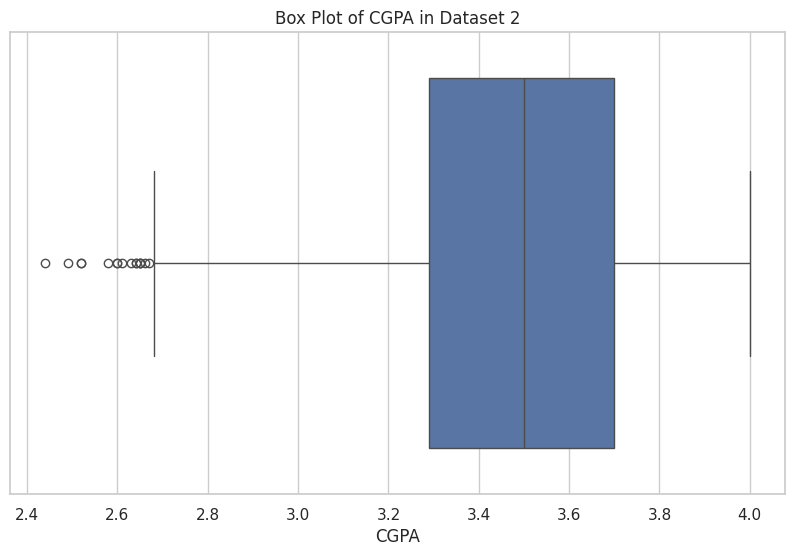

In [91]:
# Histogram for age in df1
plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'], kde=True, color='blue')
plt.title('Distribution of Age in Dataset 1')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot for CGPA in df2
plt.figure(figsize=(10, 6))
sns.boxplot(x='CGPA', data=df2)
plt.title('Box Plot of CGPA in Dataset 2')
plt.show()


The code block generates a count plot for the 'Choose your gender' variable in df1 using Seaborn's countplot function. displays the frequency distribution of gender categories within the dataset

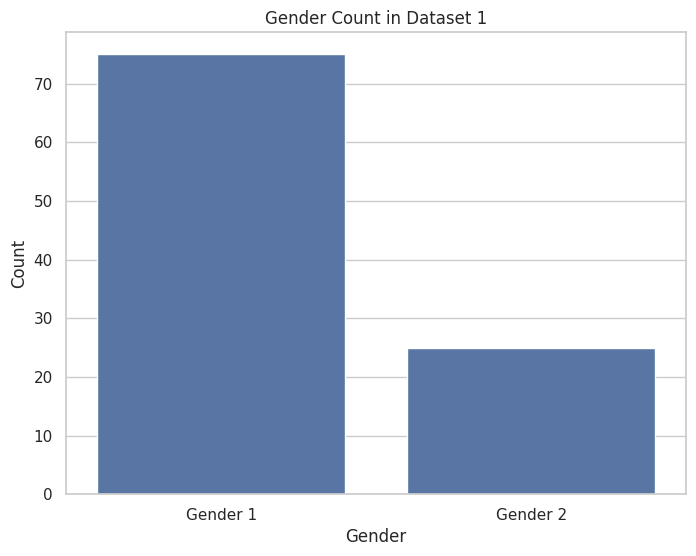

In [92]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Choose your gender', data=df1)
plt.title('Gender Count in Dataset 1')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Gender 1', 'Gender 2'])
plt.show()


This code block focuses on analyzing the correlation among numeric features in df2. First, it identifies all numeric columns in the dataset and computes the correlation matrix for these columns. It then visualizes this matrix using a heatmap from Seaborn. these visualizations are crucial for identifying relationships between variables

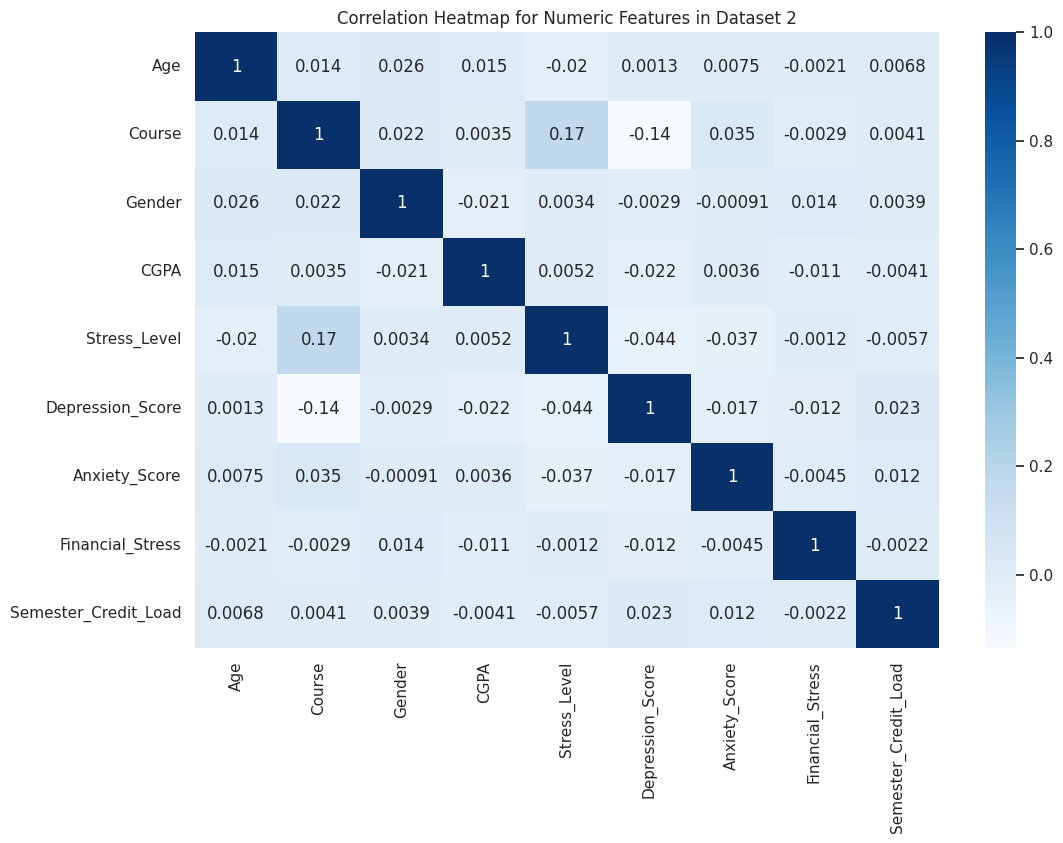

In [93]:
numeric_cols = df2.select_dtypes(include=[np.number]).columns
correlation_matrix = df2[numeric_cols].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap for Numeric Features in Dataset 2')
plt.show()


This code block creates a count plot for the 'Your current year of Study' variable in the df1 dataset using Seaborn's countplot function.This visualization is useful for understanding the demographic composition of students based on their academic progress

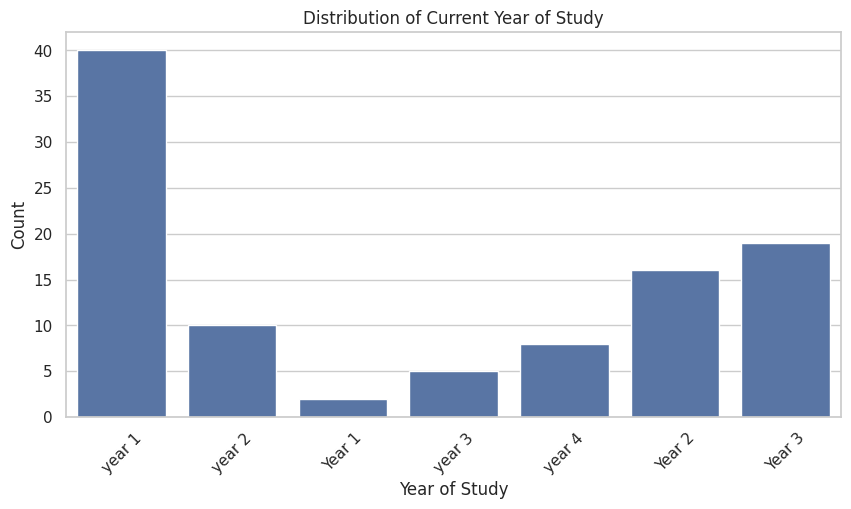

In [94]:
# Count plot for 'Your current year of Study' in df1
plt.figure(figsize=(10, 5))
sns.countplot(data=df1, x='Your current year of Study')
plt.title('Distribution of Current Year of Study')
plt.xlabel('Year of Study')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


This code block creates a violin plot to visually compare the distribution of CGPA across different gender categories in the df2 dataset.

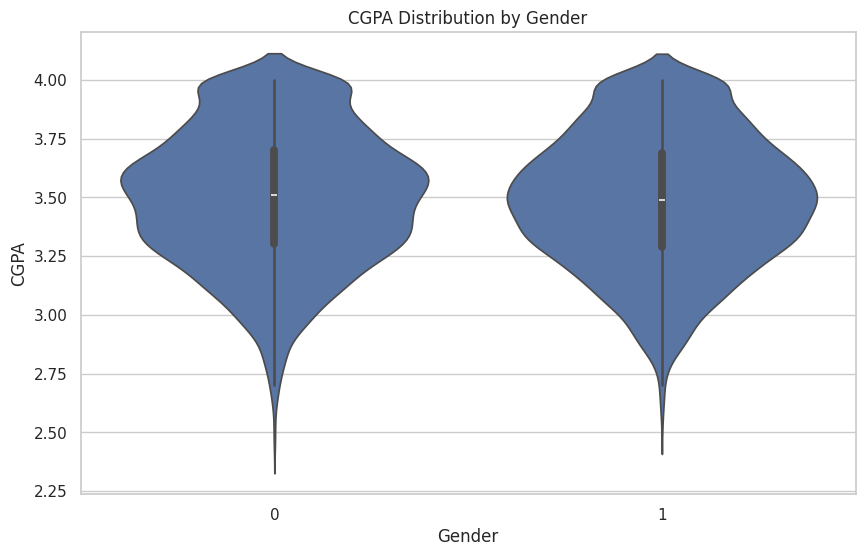

In [95]:
# Violin plot for 'Gender' vs 'CGPA'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='CGPA', data=df2)
plt.title('CGPA Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('CGPA')
plt.show()


This code block generates a box plot for the 'Anxiety_Score' variable from the df2 dataset using Seaborn's boxplot function. generally this plot helps in identifying the points which are going out from the boundaries.

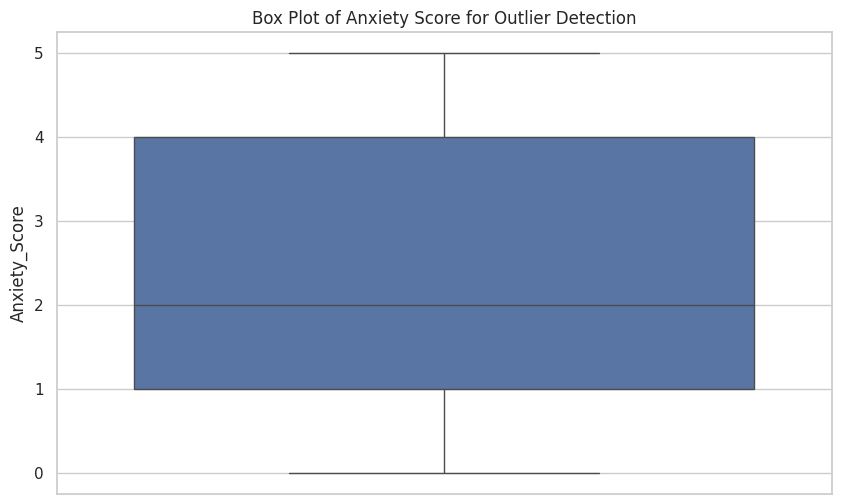

In [96]:

plt.figure(figsize=(10, 6))
sns.boxplot(df2['Anxiety_Score'])
plt.title('Box Plot of Anxiety Score for Outlier Detection')
plt.show()


This code block creates a linear regression plot using Seaborn's lmplot function to visualize the relationship between 'Age' and 'Depression_Score'. This plot generally visualizes the depression scores related to the age.

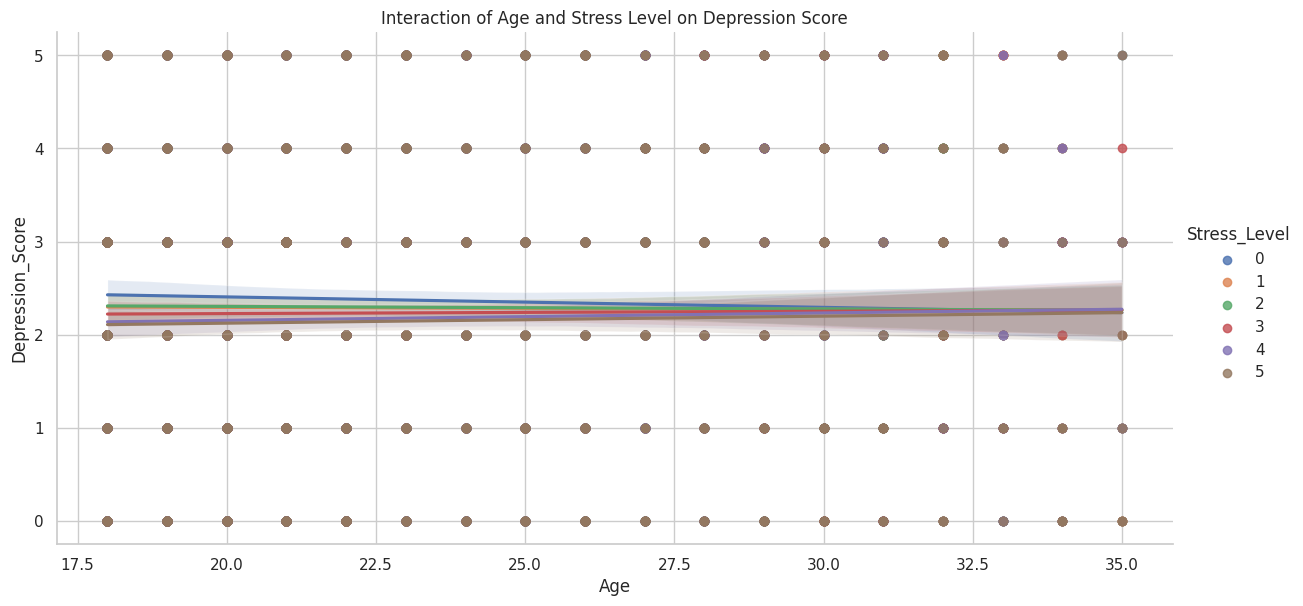

In [97]:

sns.lmplot(x='Age', y='Depression_Score', hue='Stress_Level', data=df2, aspect=2, height=6)
plt.title('Interaction of Age and Stress Level on Depression Score')
plt.show()


#2.BASELINE MODEL

Below code blocks are simple baseline models for both classification and regression tasks using basic statistical measures from the training data.

In [98]:
#classification
most_frequent_class = np.bincount(y_train_c).argmax()  # Most frequent class in the training data
baseline_pred_c = np.full_like(y_test_c, most_frequent_class)  # Predict this class for all test instances


regression

In [99]:
#regression
median_value = np.median(y_train_r)  # Median of training data
baseline_pred_r = np.full_like(y_test_r, median_value)  # Predict this value for all test instances


Evaluate Baseline Models

The code block displays evaluation metrics for baseline models in both classification and regression

In [100]:
# Classification Metrics for Baseline
baseline_accuracy = accuracy_score(y_test_c, baseline_pred_c)
baseline_precision = precision_score(y_test_c, baseline_pred_c, zero_division=1)  # Handle division by zero if class imbalance

# Regression Metrics for Baseline
baseline_mse = mean_squared_error(y_test_r, baseline_pred_r)
baseline_mae = mean_absolute_error(y_test_r, baseline_pred_r)

print("Baseline Classification Metrics:")
print(f"Accuracy: {baseline_accuracy:.4f}")
print(f"Precision: {baseline_precision:.4f}")

print("Baseline Regression Metrics:")
print(f"Mean Squared Error: {baseline_mse:.4f}")
print(f"Mean Absolute Error: {baseline_mae:.4f}")


Baseline Classification Metrics:
Accuracy: 0.6458
Precision: 1.0000
Baseline Regression Metrics:
Mean Squared Error: 2.6821
Mean Absolute Error: 1.3552


#3.TARINING BOTH THE MODELS

The provided code block sets up and trains two types of neural network models : a classification model and a regression model.The classification model is designed with a sigmoid activation function in the output layer. the regression model uses a linear output layer (default activation is linear), appropriate for predicting continuous values.

In [101]:
# Classification Model
model_classification = Sequential([
    Dense(64, activation='relu', input_dim=X_train_c_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_classification.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Regression Model
model_regression = Sequential([
    Dense(64, activation='relu', input_dim=X_train_r_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])
model_regression.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Training
model_classification.fit(X_train_c_scaled, y_train_c, epochs=50, batch_size=32, validation_split=0.2)
model_regression.fit(X_train_r_scaled, y_train_r, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
1342/1342 [==============================] - 11s 7ms/step - loss: 0.4004 - accuracy: 0.8155 - val_loss: 0.3645 - val_accuracy: 0.8356
Epoch 2/50
1342/1342 [==============================] - 6s 4ms/step - loss: 0.3547 - accuracy: 0.8252 - val_loss: 0.3383 - val_accuracy: 0.8374
Epoch 3/50
1342/1342 [==============================] - 8s 6ms/step - loss: 0.3271 - accuracy: 0.8389 - val_loss: 0.3116 - val_accuracy: 0.8475
Epoch 4/50
1342/1342 [==============================] - 5s 4ms/step - loss: 0.3007 - accuracy: 0.8518 - val_loss: 0.2863 - val_accuracy: 0.8648
Epoch 5/50
1342/1342 [==============================] - 3s 2ms/step - loss: 0.2746 - accuracy: 0.8648 - val_loss: 0.2551 - val_accuracy: 0.8878
Epoch 6/50
1342/1342 [==============================] - 4s 3ms/step - loss: 0.2472 - accuracy: 0.8829 - val_loss: 0.2312 - val_accuracy: 0.9072
Epoch 7/50
1342/1342 [==============================] - 3s 3ms/step - loss: 0.2245 - accuracy: 0.8955 - val_loss: 0.2083 - val_accuracy

#4.EVALUATING MODELS

In the below series of code block we have evaluated the neural network models : a Classification model and a regression model. For the classification model, it measures the loss and accuracy .For the regression model, it evaluates the model to obtain loss and mean absolute error (MAE)

In [102]:
# Evaluate the models
loss_c, accuracy_c = model_classification.evaluate(X_test_c_scaled, y_test_c)
loss_r, mae_r = model_regression.evaluate(X_test_r_scaled, y_test_r)

print(f"Classification Accuracy: {accuracy_c:.2f}")
print(f"Regression MAE: {mae_r:.2f}")


420/420 [==============================] - 1s 2ms/step - loss: 2.3115 - mean_absolute_error: 1.2660
Classification Accuracy: 0.94
Regression MAE: 1.27


Evaluating Classification Model:

In [103]:
from tensorflow.keras.metrics import AUC

y_pred_c_prob = model_classification.predict(X_test_c_scaled)
y_pred_c = (y_pred_c_prob > 0.5).astype(int)


accuracy = accuracy_score(y_test_c, y_pred_c)
precision = precision_score(y_test_c, y_pred_c)
recall = recall_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)
auc = roc_auc_score(y_test_c, y_pred_c_prob)  # Ensure y_pred_c_prob is used here

print("Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")


420/420 [==============================] - 1s 2ms/step
Classification Metrics:
Accuracy: 0.9440
Precision: 0.9442
Recall: 0.8947
F1 Score: 0.9188
AUC-ROC: 0.9894


Evaluating Regression Model:

In [104]:
# Predict regression values
y_pred_r = model_regression.predict(X_test_r_scaled)


mse = mean_squared_error(y_test_r, y_pred_r)
mae = mean_absolute_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print("Regression Metrics:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")


420/420 [==============================] - 1s 2ms/step
Regression Metrics:
Mean Squared Error: 2.3115
Mean Absolute Error: 1.2660
R-squared: 0.1138


#4.EVALUATING BOTH THE MODELS WITH BASELINE MODELS

IN the below series of code blocks , we have compared the performance of deep learning models against baseline models for both classification and regression tasks. Then we visualized these metrics using bar plots to provide a clear graphical representation of the differences in performance metrics between the deep learning models and their corresponding baseline models as mentioned in the rubiric.

In [105]:
print("Deep Learning Model vs Baseline Model Performance")
print("\nClassification:")
print(f"Model Accuracy: {accuracy:.4f} vs Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Model Precision: {precision:.4f} vs Baseline Precision: {baseline_precision:.4f}")

print("\nRegression:")
print(f"Model MSE: {mse:.4f} vs Baseline MSE: {baseline_mse:.4f}")
print(f"Model MAE: {mae:.4f} vs Baseline MAE: {baseline_mae:.4f}")


Deep Learning Model vs Baseline Model Performance

Classification:
Model Accuracy: 0.9440 vs Baseline Accuracy: 0.6458
Model Precision: 0.9442 vs Baseline Precision: 1.0000

Regression:
Model MSE: 2.3115 vs Baseline MSE: 2.6821
Model MAE: 1.2660 vs Baseline MAE: 1.3552


#PLOTTING THE RESULTS

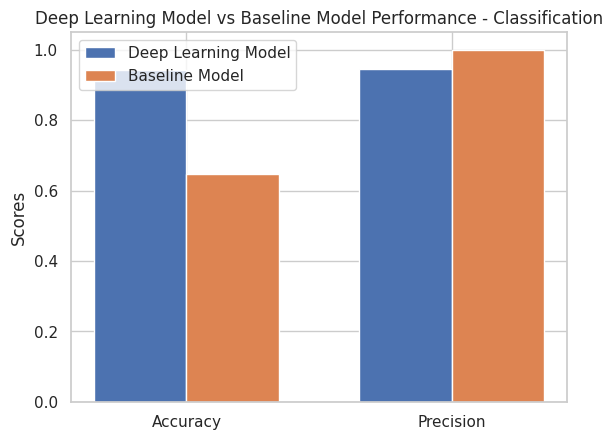

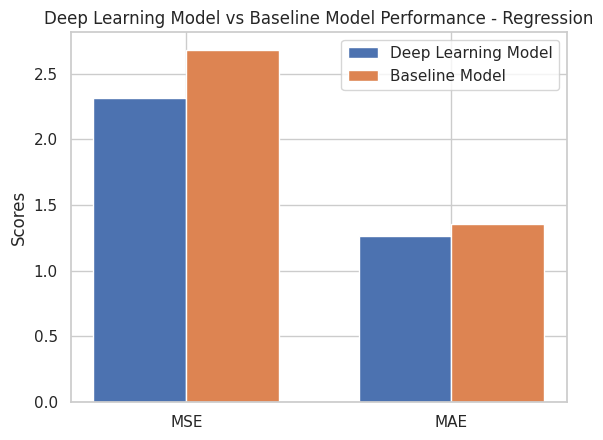

In [106]:
import matplotlib.pyplot as plt

classification_metrics = ['Accuracy', 'Precision']
classification_values = [accuracy, precision]
baseline_classification_values = [baseline_accuracy, baseline_precision]

regression_metrics = ['MSE', 'MAE']
regression_values = [mse, mae]
baseline_regression_values = [baseline_mse, baseline_mae]


width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(classification_metrics)), classification_values, width, label='Deep Learning Model')
bar2 = ax.bar(np.arange(len(classification_metrics)) + width, baseline_classification_values, width, label='Baseline Model')

ax.set_ylabel('Scores')
ax.set_title('Deep Learning Model vs Baseline Model Performance - Classification')
ax.set_xticks(np.arange(len(classification_metrics)) + width / 2)
ax.set_xticklabels(classification_metrics)
ax.legend()

fig, ax1 = plt.subplots()
bar3 = ax1.bar(np.arange(len(regression_metrics)), regression_values, width, label='Deep Learning Model')
bar4 = ax1.bar(np.arange(len(regression_metrics)) + width, baseline_regression_values, width, label='Baseline Model')

ax1.set_ylabel('Scores')
ax1.set_title('Deep Learning Model vs Baseline Model Performance - Regression')
ax1.set_xticks(np.arange(len(regression_metrics)) + width / 2)
ax1.set_xticklabels(regression_metrics)
ax1.legend()

plt.show()


#DATASET-3:

#1.LOAD THE DATASET

In the below we ahve laoded the dataset, which is generally the happines ranking report of the countries based on some of the factors. Then preprocessing is done on the dataset.The features are scaled using StandardScaler to normalize the data.dataset is split into training and testing sets with 80% of the data used for training and 20% reserved for testing.

In [107]:
data = pd.read_csv('https://raw.githubusercontent.com/BapureddyY/deeplearning/main/2019.csv')

data_numeric = data.drop(columns=['Overall rank', 'Country or region'])

print(data_numeric.head())

X = data_numeric.drop('Score', axis=1)
y = data_numeric['Score']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


   Score  GDP per capita  Social support  Healthy life expectancy  \
0  7.769           1.340           1.587                    0.986   
1  7.600           1.383           1.573                    0.996   
2  7.554           1.488           1.582                    1.028   
3  7.494           1.380           1.624                    1.026   
4  7.488           1.396           1.522                    0.999   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                         0.596       0.153                      0.393  
1                         0.592       0.252                      0.410  
2                         0.603       0.271                      0.341  
3                         0.591       0.354                      0.118  
4                         0.557       0.322                      0.298  


#TRAIN THE MODEL

The code block sets up and trains a neural network for regression using TensorFlow's Keras API. The model architecture consists of a sequential layout with three layers: an input layer with 128 neurons, a hidden layer with 64 neurons (both using ReLU activation), and an output layer with a single neuron for continuous output prediction.

In [108]:
# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)


Epoch 1/100
7/7 [==============================] - 1s 32ms/step - loss: 27.9602 - mean_absolute_error: 5.1419 - val_loss: 21.9511 - val_mean_absolute_error: 4.5034
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 21.0898 - mean_absolute_error: 4.4038 - val_loss: 15.8582 - val_mean_absolute_error: 3.7289
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 15.2803 - mean_absolute_error: 3.6864 - val_loss: 10.7812 - val_mean_absolute_error: 3.0792
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 10.2341 - mean_absolute_error: 2.9562 - val_loss: 6.8804 - val_mean_absolute_error: 2.5090
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 6.3776 - mean_absolute_error: 2.2531 - val_loss: 4.4359 - val_mean_absolute_error: 1.9277
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 3.8217 - mean_absolute_error: 1.6711 - val_loss: 3.2051 - val_mean_absolute_error: 1.4404
Epoch 7/100
7/7 [====

#RESULTS OF THE MODEL WITH TEST SET

The code block evaluates the performance of the trained neural network model on the test dataset, obtaining the mean squared error (loss) and mean absolute error (MAE), and then prints these metrics

1/1 [==============================] - 0s 27ms/step - loss: 0.4398 - mean_absolute_error: 0.5424
Test Loss: 0.43979039788246155, Test MAE: 0.5423849821090698


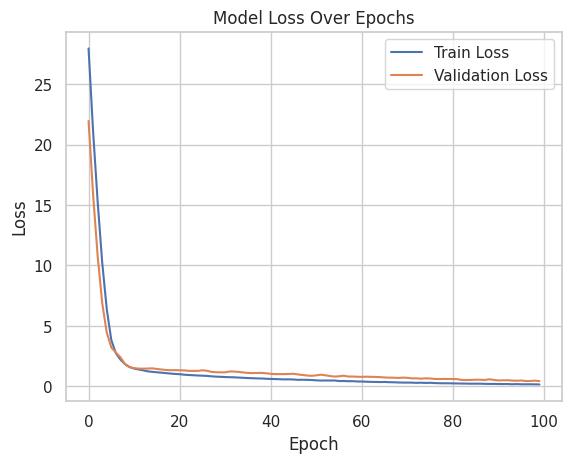

In [109]:

test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')


import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


#BASELINE MODEL

The below series of code blocks are for the baseline models to compare the performance on the same dataset with the baseline models.

In [110]:

mean_score = y_train.mean()

baseline_predictions = np.full(shape=(y_test.shape[0],), fill_value=mean_score)


from sklearn.metrics import mean_squared_error, mean_absolute_error

baseline_mse = mean_squared_error(y_test, baseline_predictions)
baseline_mae = mean_absolute_error(y_test, baseline_predictions)
print(f'Baseline MSE: {baseline_mse}, Baseline MAE: {baseline_mae}')


Baseline MSE: 1.0444315956685744, Baseline MAE: 0.8334128024193548


#EVALUATING THE MODEL WITH BASELINE MODELS

In [111]:

print(f"Deep Learning Model - Test Loss: {test_loss}, Test MAE: {test_mae}")
print(f"Baseline Model - MSE: {baseline_mse}, MAE: {baseline_mae}")


Deep Learning Model - Test Loss: 0.43979039788246155, Test MAE: 0.5423849821090698
Baseline Model - MSE: 1.0444315956685744, MAE: 0.8334128024193548


#PLOTTED THE COMPARISON BETWEEN MODEL AND BASELINE MODEL

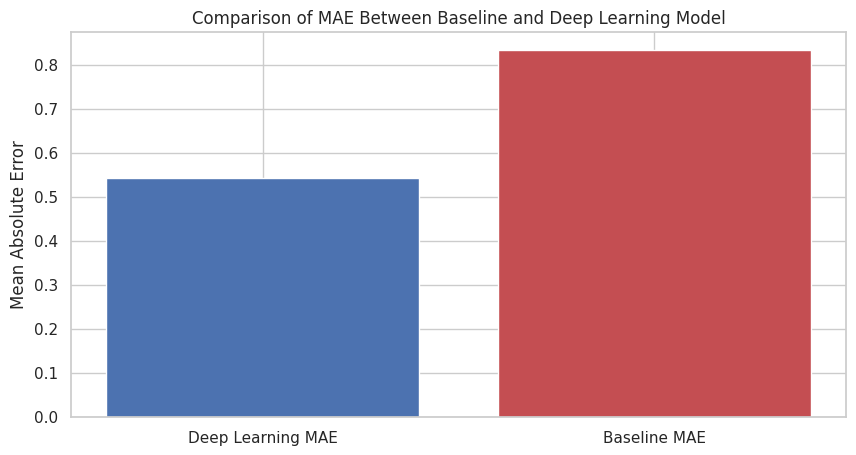

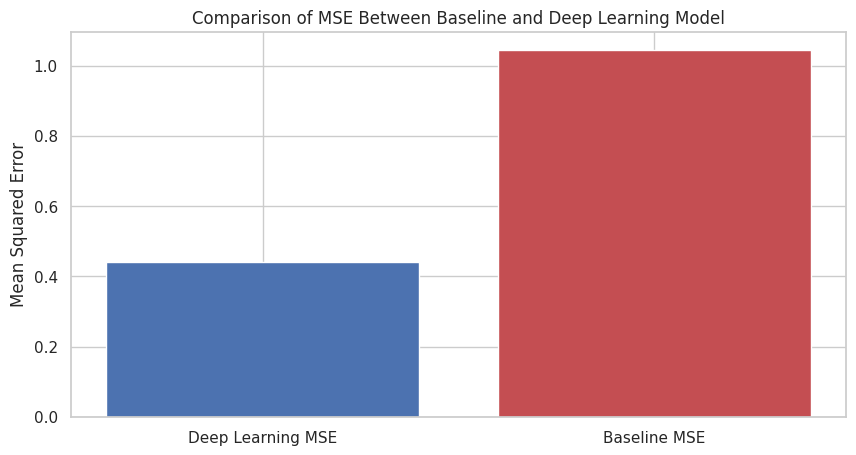

In [112]:

plt.figure(figsize=(10, 5))
plt.bar('Deep Learning MAE', test_mae, color='b')
plt.bar('Baseline MAE', baseline_mae, color='r')
plt.title('Comparison of MAE Between Baseline and Deep Learning Model')
plt.ylabel('Mean Absolute Error')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar('Deep Learning MSE', test_loss, color='b')
plt.bar('Baseline MSE', baseline_mse, color='r')
plt.title('Comparison of MSE Between Baseline and Deep Learning Model')
plt.ylabel('Mean Squared Error')
plt.show()
